# Reading CTB Mythen data with Python

This is a first example on how data can be read in Python using. We will need to add more configuration options later.

In [1]:
#Adding paths, this is normally not needed
import sys
sys.path.append('/home/l_frojdh/slsdetectorgroup/build/bin')
sys.path.append('/home/l_frojdh/slsdetectorgroup/sls_detector_tools/')


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from _sls_detector.io import read_ctb_file
from sls_detector_tools.plot import imshow

## Read threshold scan into numpy array

In [3]:
start = 600
stop = 1800
threshold = np.arange(start, stop, 1)

nrow = stop-start
ncol = 64*3
data = np.zeros((nrow, ncol))

for i, th in enumerate(threshold):
    data[i] = read_ctb_file(f'/home/l_frojdh/mythendata/MoKbZr_30kV60mA_1s_200V_thr{th}_1.raw', 8, 24)



## Plot data

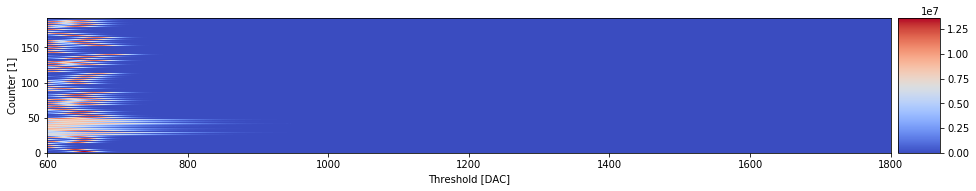

In [4]:
ax, im = imshow(np.rot90(data), kwargs = {'extent': (start,stop,0,ncol)})
ax.set_xlabel('Threshold [DAC]')
ax.set_ylabel('Counter [1]');



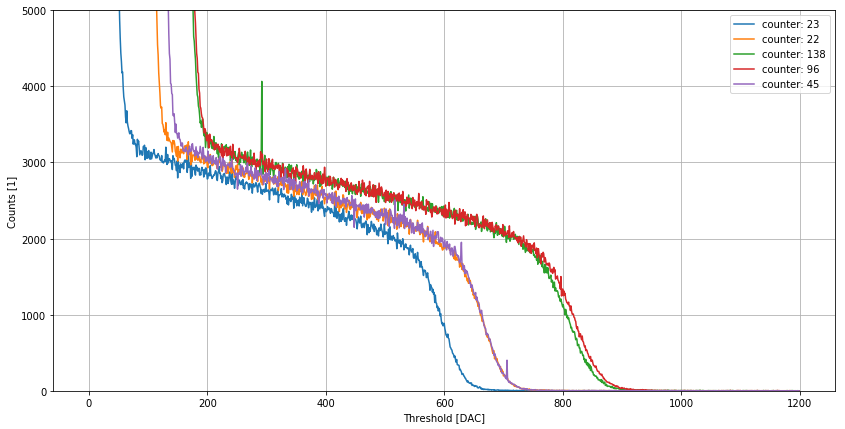

In [5]:
fig, ax = plt.subplots(1,1, figsize=(14,7))
for counter in np.random.randint(0,192,5):
    ax.plot(data[:, counter], label = f'counter: {counter}')
ax.set_ylim(0,5000)
ax.set_xlabel('Threshold [DAC]')
ax.set_ylabel('Counts [1]')
ax.legend()
ax.grid()